### MNIST Binary Classifier

In this notebook, we will implement a CNN classifier to classify the digits 0 and 1 from the MNIST dataset. The objective of this lesson is twofold:
* To build our first CNN classifier (binary).
* To demonstrate the importance of cross-entropy.
* To compare the speed of CPU vs GPU training.

Let's start with the ususal imports.

In [1]:
# For comparison purposes, we will force Tensorflow to use CPU here
# Cmment out this cell if you want to use GPU (if available)
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D
from tensorflow.keras import Model
from time import time

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Set the seeds for reproducibility
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

#### Dataset Loading

We have already inspected the MNIST dataset. We are going to load it now since we are going to use it for training the classifier.

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Dataset params
num_classes = 10
size = x_train.shape[1]

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


#### Dataset Preprocessing

In this example, we are going to train a binary classifier to classify the digits 0 and 1. Therefore, we have to remove all other digits (classes) from the dataset.

In [4]:
mask_train = np.logical_or(y_train == 0, y_train == 1)
x_train = x_train[mask_train, ...]
y_train = y_train[mask_train]

mask_test = np.logical_or(y_test == 0, y_test == 1)
x_test = x_test[mask_test, ...]
y_test = y_test[mask_test]

# Normalization
x_train = x_train/255
x_test = x_test/255

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    12665 samples
Test set:     2115 samples
Sample dims:  (12665, 28, 28)


#### Building the Classifier

We are going to build a relatively simple convolutional neural network (CNN) for this task.

In [5]:
inputs = Input(shape=(size, size, 1))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(1, activation="linear")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0     

This is an extremely simple model (for a usual classification task) yet it already contains several thousand of (trainable) parameters. However, it still far less than the 12.5k parameters we used in the previous lesson.

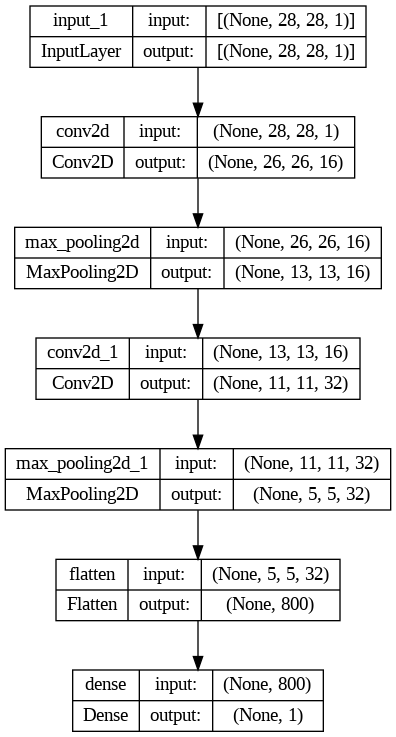

In [6]:
# Plot the model
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

#### Training

Let's now compile and train the model. We will use the well-known MSE as our loss function.

Note: MSE is **not** the suitable loss for classification task but it serves us here well for the demonstration purposes. We will learn how to design a classifier in a proper way later in this lesson ;-)

In [7]:
epochs = 25
batch_size = 128

model.compile(loss="mse", optimizer="adam", metrics=["accuracy"])

start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
90/90 [==============================] - 5s 45ms/step - loss: 0.0494 - accuracy: 0.9517 - val_loss: 0.0070 - val_accuracy: 0.9984
Epoch 2/25
90/90 [==============================] - 5s 51ms/step - loss: 0.0063 - accuracy: 0.9985 - val_loss: 0.0055 - val_accuracy: 0.9992
Epoch 3/25
90/90 [==============================] - 4s 48ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 4/25
90/90 [==============================] - 4s 43ms/step - loss: 0.0038 - accuracy: 0.9990 - val_loss: 0.0030 - val_accuracy: 0.9992
Epoch 5/25
90/90 [==============================] - 5s 53ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 6/25
90/90 [==============================] - 4s 44ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7/25
90/90 [==============================] - 4s 43ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 8/25
90

Let's now plot the history to see the evolution of the training.

Train Acc      0.9998245239257812
Validation Acc 1.0


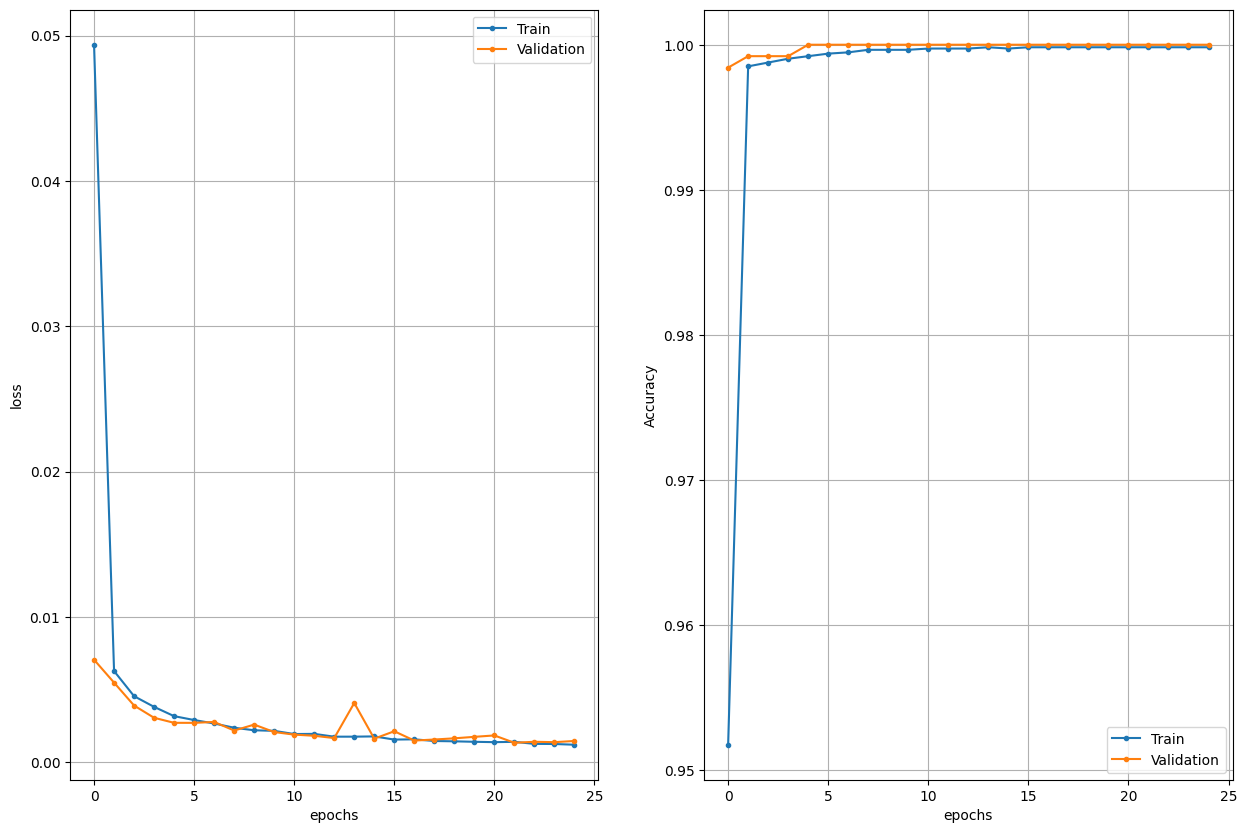

In [8]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, h['accuracy'], '.-',
                               epochs, h['val_accuracy'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'])

    print('Train Acc     ', h['accuracy'][-1])
    print('Validation Acc', h['val_accuracy'][-1])

plot_history(history)

#### Evaluation

As we did in the previous lesson, we are going to evaluate the trained model.

In [9]:
# Compute the predictions on the test set
y_pred = model.predict(x_test)

print('True', y_test[0:5].flatten())
print('Pred', y_pred[0:5].flatten())

67/67 [==============================] - 0s 5ms/step
True [1 0 1 0 0]
Pred [ 1.0189573e+00 -2.1564277e-02  1.0253223e+00 -1.5856512e-04
 -1.9988617e-02]


In [10]:
y_true = y_test.flatten()
y_pred = y_pred.flatten() > 0.5

# Overall accuracy
num_samples = len(y_true)
acc = np.sum(y_test == y_pred)/num_samples

# Accuracy for digit 0
mask = y_true == 0
acc0 = np.sum(y_test[mask] == y_pred[mask])/np.sum(mask)

# Accuracy for digit 1
mask = y_true == 1
acc1 = np.sum(y_test[mask] == y_pred[mask])/np.sum(mask)

print('Overall acc', acc)
print('Digit-0 acc', acc0)
print('Digit-1 acc', acc1)

Overall acc 0.9995271867612293
Digit-0 acc 0.9989795918367347
Digit-1 acc 1.0


We now visualise some of the evaluation results.

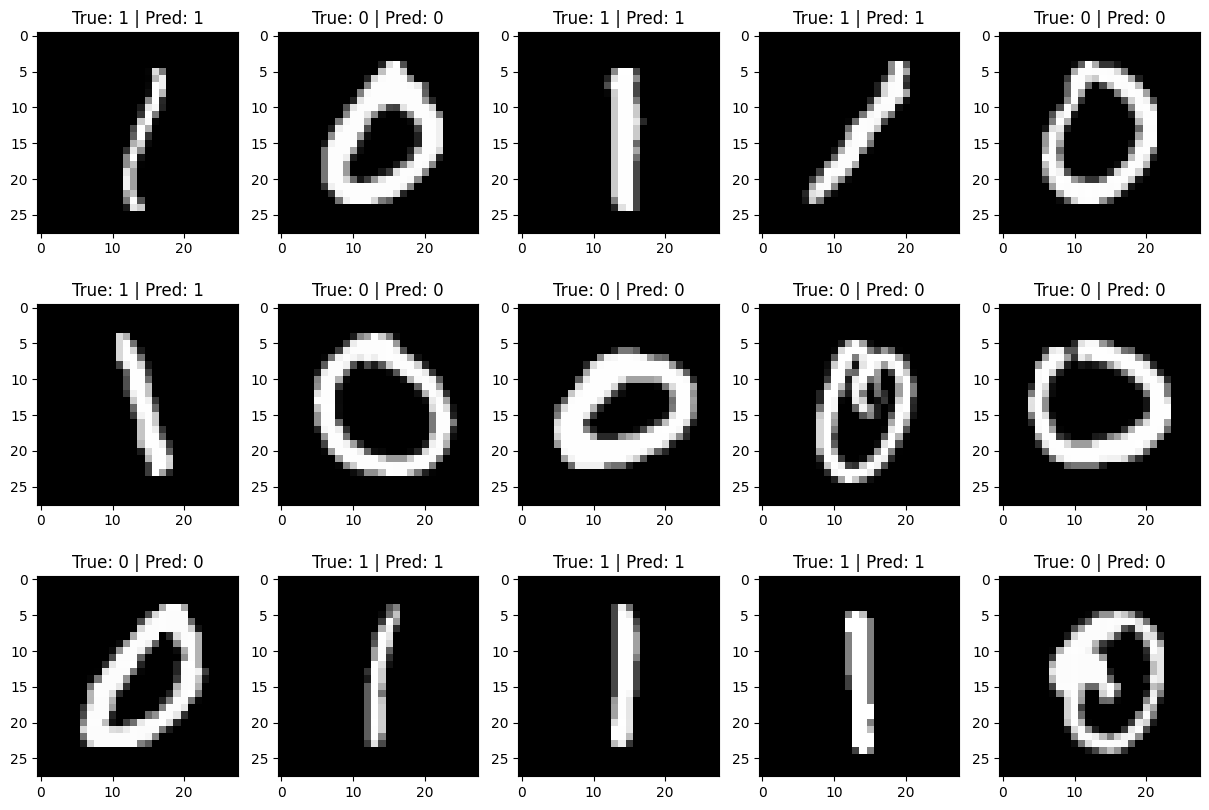

In [11]:
for ii in range(15):
    idx = np.random.randint(0, len(y_pred))
    plt.subplot(3,5,ii+1), plt.imshow(x_test[idx, ...], cmap='gray')
    plt.title('True: ' + str(y_true[idx]) + ' | Pred: ' + str(int(y_pred[idx])))

#### CPU vs GPU

We are now going to repeat the process but training on the GPU. How did the training time changed?

### Full MNIST Classification

So far we have implemented a binary MNIST classifier that is able to classify handwritten zeros and ones. However, the MNIST dataset contains (obviously) more digits. How can we extend the classifier to account for all possible digits? Would a straightforward extension work? Let's see :-)

First, we are going to load the data (and keep all the digits!) and build the exactly same CNN as before.

In [12]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalization
x_train = x_train/255
x_test = x_test/255

print('Train set:   ', len(y_train), 'samples')
print('Test set:    ', len(y_test), 'samples')
print('Sample dims: ', x_train.shape)

Train set:    60000 samples
Test set:     10000 samples
Sample dims:  (60000, 28, 28)


In [13]:
inputs = Input(shape=(size, size, 1))

net = Conv2D(16, kernel_size=(3, 3), activation="relu")(inputs)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Conv2D(32, kernel_size=(3, 3), activation="relu")(net)
net = MaxPooling2D(pool_size=(2, 2))(net)
net = Flatten()(net)
outputs = Dense(1, activation="linear")(net)

model = Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0   

#### Tranining

We train the network the same way we did before. We are going to use the MSE as the loss function and demonstrate why it is not a good idea to use it for classification purposes :-) This is also the reason why we cannot use the built-in accuracy metric anymore.

Also note that the training now takes longer since we are using all the available data (we didn't filter out any samples).

In [14]:
epochs = 25
batch_size = 128

model.compile(loss="mse", optimizer="adam", metrics=["mse"])

start = time()
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
print('Elapsed time', time() - start)

Epoch 1/25
422/422 [==============================] - 25s 57ms/step - loss: 4.3179 - mse: 4.3179 - val_loss: 1.9686 - val_mse: 1.9686
Epoch 2/25
422/422 [==============================] - 23s 55ms/step - loss: 1.9233 - mse: 1.9233 - val_loss: 1.4849 - val_mse: 1.4849
Epoch 3/25
422/422 [==============================] - 21s 49ms/step - loss: 1.6562 - mse: 1.6562 - val_loss: 1.3846 - val_mse: 1.3846
Epoch 4/25
422/422 [==============================] - 20s 46ms/step - loss: 1.4742 - mse: 1.4742 - val_loss: 1.2201 - val_mse: 1.2201
Epoch 5/25
422/422 [==============================] - 21s 49ms/step - loss: 1.3602 - mse: 1.3602 - val_loss: 1.1018 - val_mse: 1.1018
Epoch 6/25
422/422 [==============================] - 20s 48ms/step - loss: 1.2900 - mse: 1.2900 - val_loss: 1.0586 - val_mse: 1.0586
Epoch 7/25
422/422 [==============================] - 22s 53ms/step - loss: 1.2117 - mse: 1.2117 - val_loss: 1.0138 - val_mse: 1.0138
Epoch 8/25
422/422 [==============================] - 21s 49ms

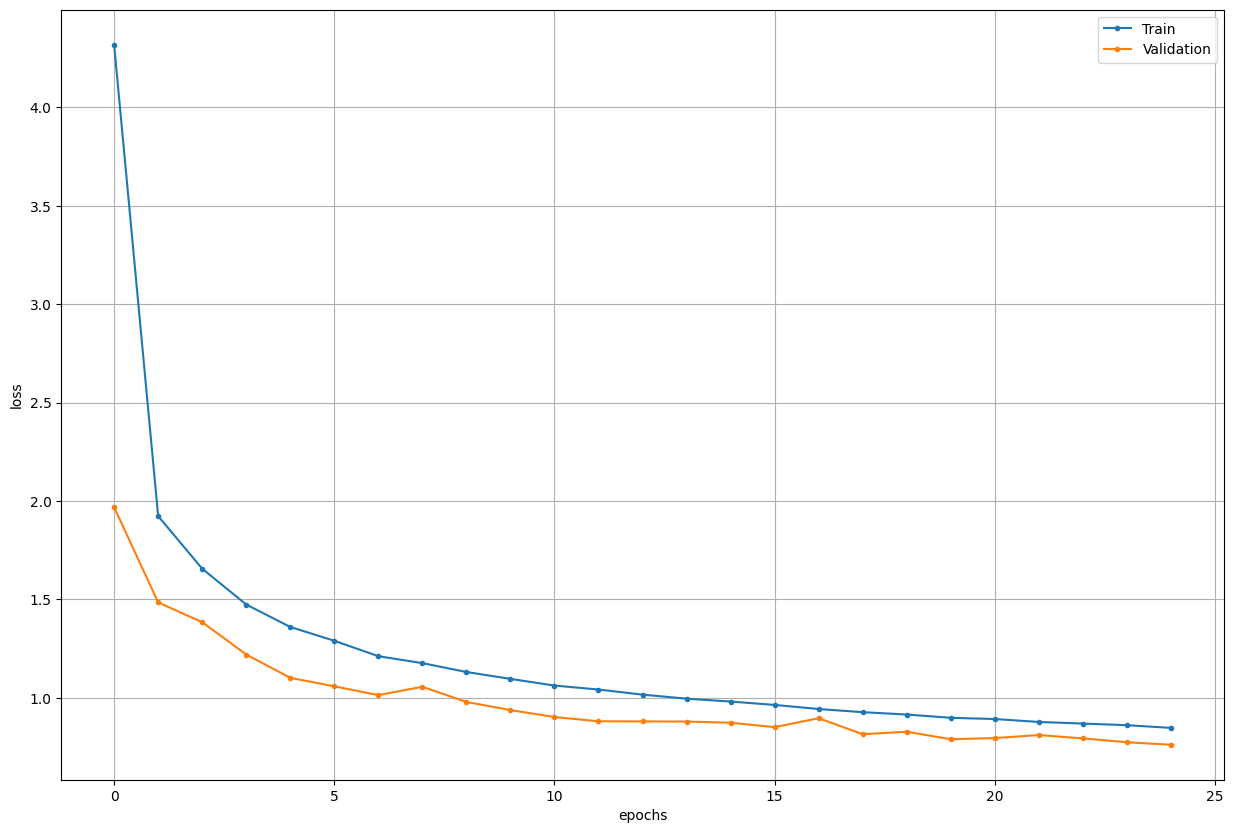

In [15]:
h = history.history
epochs = range(len(h['loss']))

plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
plt.legend(['Train', 'Validation'])

#### Evaluation

No we are going to evaluate the classifier accuracy for all digits.

In [16]:
y_pred = model.predict(x_test)

print('True', y_test[100:105].flatten())
print('Pred', y_pred[100:105].flatten())

313/313 [==============================] - 2s 5ms/step
True [6 0 5 4 9]
Pred [ 5.760143   -0.12753645  5.2668843   3.4214575   8.676596  ]


In [17]:
y_true = y_test.flatten()
y_pred = y_pred.flatten()
digits = range(0, 10)

for digit in digits:
    mask = y_true == digit
    # Count the true positives (the closest digit)
    tp = np.sum(np.abs(y_pred[mask] - digit) < 0.5)
    total = np.sum(mask)
    print('Digit-', digit, ' acc', tp/total)

print('y_true', y_true[mask])
print('y_pred', y_pred[mask])

Digit- 0  acc 0.46224489795918366
Digit- 1  acc 0.7480176211453744
Digit- 2  acc 0.45542635658914726
Digit- 3  acc 0.5356435643564357
Digit- 4  acc 0.5285132382892057
Digit- 5  acc 0.5526905829596412
Digit- 6  acc 0.5260960334029228
Digit- 7  acc 0.5593385214007782
Digit- 8  acc 0.43121149897330596
Digit- 9  acc 0.5242814667988107
y_true [9 9 9 ... 9 9 9]
y_pred [7.3926682 8.488434  8.776413  ... 8.668969  8.466915  8.430845 ]


We see that the accuracy is actually quite BAD and the predictions are not close enough to the ground truth. The reason is that we are using an inappropriate loss function for the classification task.

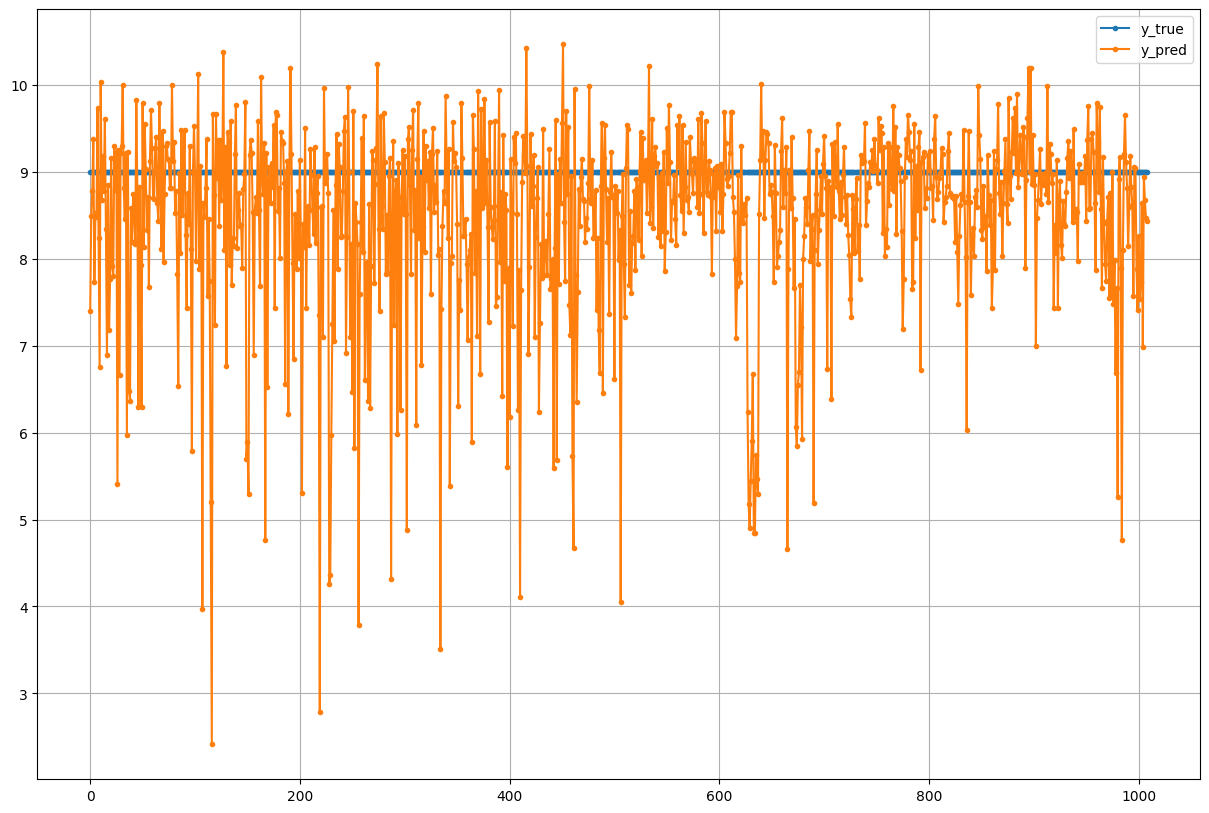

In [18]:
plt.plot(y_true[mask], '.-')
plt.plot(y_pred[mask], '.-')
plt.grid(True)
plt.legend(['y_true', 'y_pred'])